### Author: Huzaib Mujeeb Mulla

# The Sparks Foundation

## Task 3- Exploratory Data Analysis - Retail

## Task Description

Perform **Exploratory Data Analysis** on dataset **SampleSuperstore.** \
As a business manager, try to find out the weak areas where you can work to make more profit. \
What all business problems you can derive by exploring the data?


> Dataset: https://bit.ly/3i4rbWl

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importing the Dataset

In [2]:
data = pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Exploring the Data

**Checking for null values in the dataset.**

In [3]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**There are no missing values in the dataset.**

In [4]:
data.shape

(9994, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Checking for duplicates in the dataset ..**

In [7]:
sum(data.duplicated(subset = None, keep = 'first'))

17

**We can notice that there are 17 duplicate rows in out dataset.** \
**Let's remove those duplicate rows before moving further.**

In [8]:
data.drop_duplicates(subset = None, keep = 'first', inplace = True)

In [9]:
data.shape

(9977, 13)

## Data Visualization

In [10]:
def getUnique(data,  target_variable, sort_by, color, threshold_categories = 10):
    
    total_cols = [i for i in data.columns.values if len(data[i].unique()) < threshold_categories and len(data[i].unique()) > 1]
    
    fig = plt.figure(figsize = (25,25))
    rows = len(total_cols) // 2
    cols = len(total_cols) // 2
    
    for i, num in zip(total_cols, range(1,len(total_cols)+1)):
        ax = fig.add_subplot(rows,cols,num)
        data.groupby(i)[target_variable].sum().sort_values(by = sort_by, ascending = False).plot(kind = 'bar', ax = ax, title = i, color = color)

    plt.tight_layout(pad = 3.0)
    plt.show()

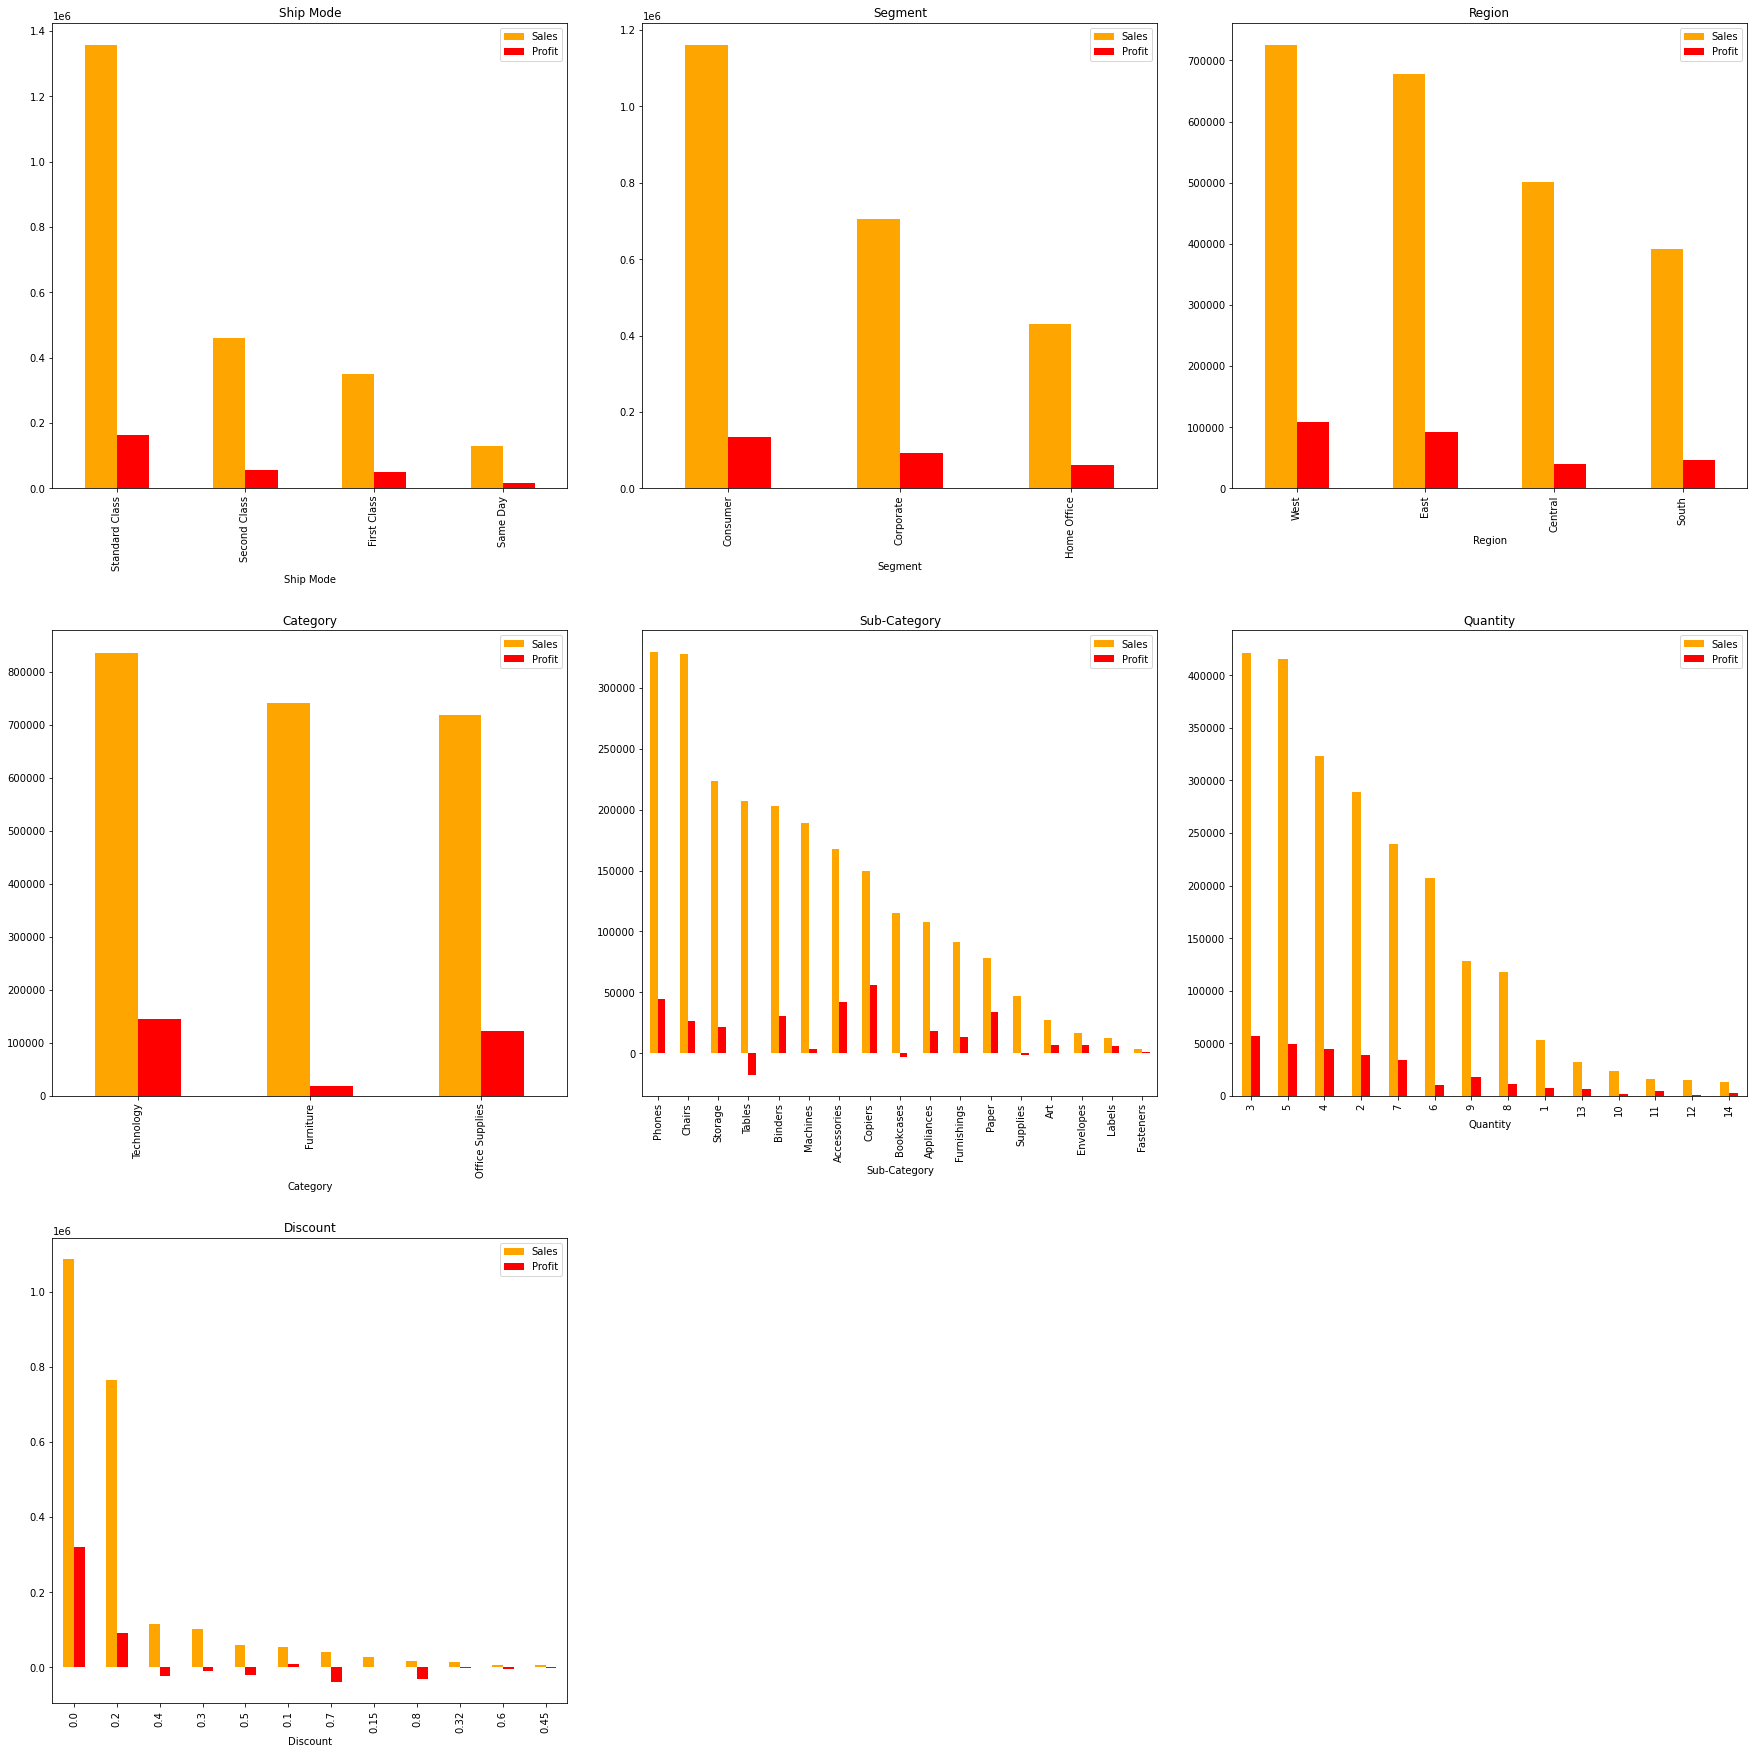

In [11]:
num_categories = 20
target_variable = ["Sales","Profit"]
sort_by = "Sales"
color = ["orange", "red"]
getUnique(data, target_variable, sort_by, color, num_categories)

**OBSERVATION:** \
1) The profits for Tables and Bookcases sub-category are very less but the profit for Copiers is very high. So, we should focus on increasing the sales of the copiers.\
2) The profits for the Office Supplies is high, but the sales of the Office Supplies is less. So, we should focus on increasing the sales for Office Supplies.

### Sales and Profits for each Category

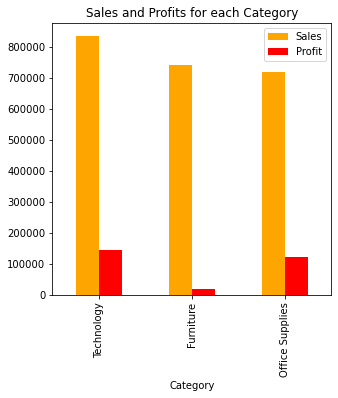

In [12]:
plt.rcParams["figure.figsize"] = [5,5]
data.groupby("Category")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["orange", "red"])
plt.title("Sales and Profits for each Category")
plt.show()

**OBSERVATION:** \
1)The sales of Furniture category is high were there is no profit. \
2)The sales of Office Supplies can be increased as it's profitable.

### Profit in particular Region

In [13]:
group = data[['Category','Region','Profit']]
test = group.groupby(['Category','Region'], as_index=False).mean()
pivot = test.pivot(index='Category', columns='Region')
pivot

Profit                                 
Region             Central       East      South       West
Category                                                   
Furniture        -6.054472   5.097041  20.395199  16.286869
Office Supplies   6.247068  23.968450  20.086827  27.821837
Technology       80.231981  88.714084  68.231506  73.962687

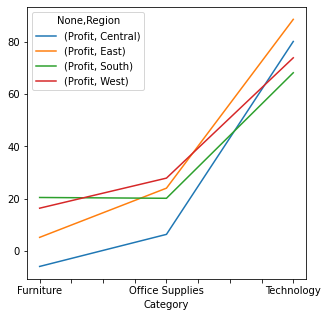

In [14]:
pivot.plot()

**OBSERVATION:** Technology shows the highest profit in all regions compared to others.

### Shipping Mode in relation to Sales

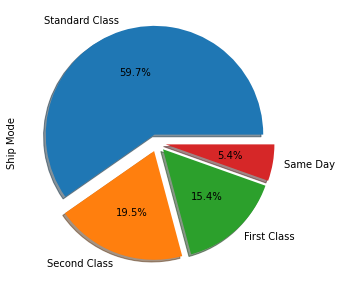

In [15]:
data['Ship Mode'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0.08,0.08,0.08,0.08])

**OBSERVATION:** Standard class has 59.7% sales which is the highest. The lowest is 5.4% having sales on the same day.

### Segments in relation to Sales

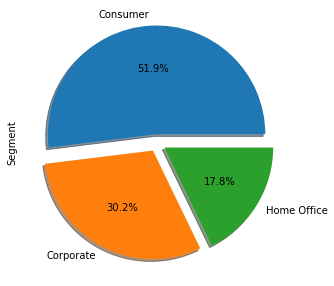

In [16]:
data['Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0.08,0.08,0.08])

**OBSERVATION:** Consumer sales are 51.9% which is highest amongst the all and the lowest is of Home Office with 17.8%.

### Sales and Profits for each State

In [17]:
data.State.unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

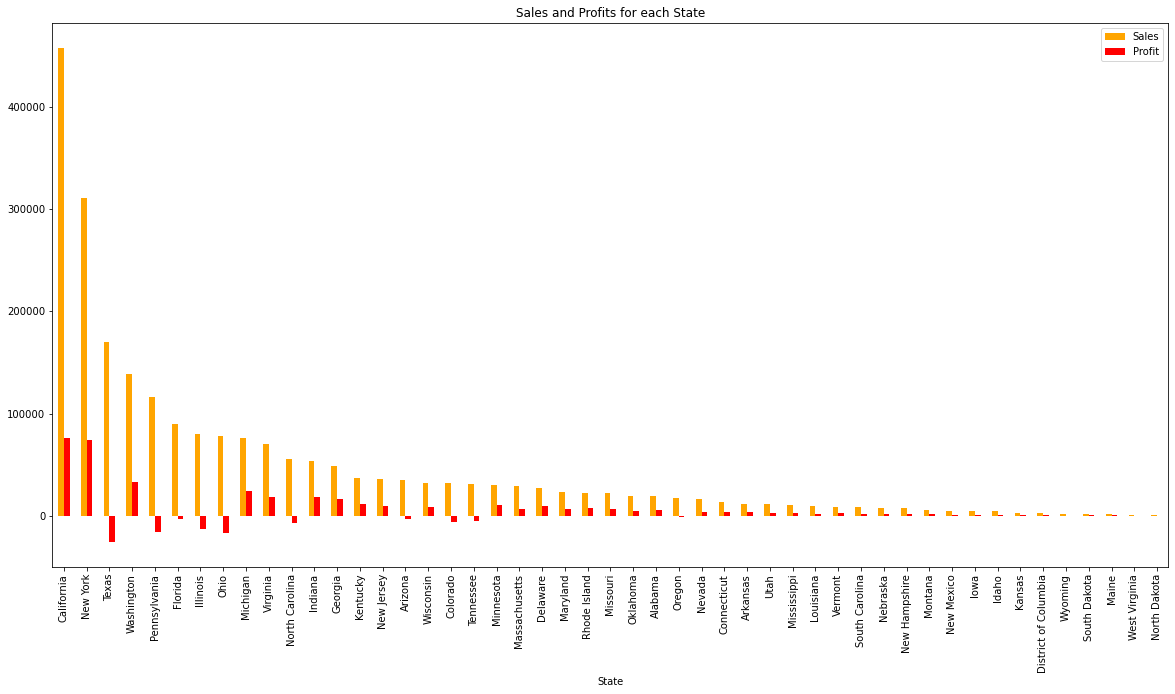

In [18]:
plt.rcParams["figure.figsize"] = [20,10]
data.groupby("State")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["orange", "red"])
plt.title("Sales and Profits for each State")
plt.show()

**OBSERVATION:** The states with high sales are generating less profit.

**Let's dig more into this.**

In [19]:
data.groupby("State").sum()['Discount'].sort_values(ascending = False)

State
Texas                   364.24
Pennsylvania            192.70
Illinois                191.10
Ohio                    152.10
California              145.60
Florida                 114.65
North Carolina           70.60
Arizona                  68.00
New York                 62.40
Colorado                 57.60
Tennessee                53.30
Oregon                   35.60
Washington               32.40
Utah                      3.20
Nevada                    2.40
New Mexico                2.20
Massachusetts             2.10
Michigan                  1.80
Idaho                     1.80
Rhode Island              1.20
Montana                   1.00
Delaware                  0.60
New Jersey                0.60
Connecticut               0.60
Maryland                  0.60
New Hampshire             0.30
West Virginia             0.30
Wyoming                   0.20
Minnesota                 0.00
Georgia                   0.00
Virginia                  0.00
Arkansas                  0.00
Ve

In [20]:
states_df = data.groupby("State")[["Sales","Profit","Discount"]].sum().sort_values(by = "Sales", ascending = False)
states_df

,Sales,Profit,Discount
State,,,
California,457576.2715,76330.7891,145.60
New York,310827.1510,74015.4622,62.40
Texas,170124.5418,-25750.9833,364.24
Washington,138560.8100,33368.2375,32.40
Pennsylvania,116496.3620,-15565.4035,192.70
Florida,89473.7080,-3399.3017,114.65
Illinois,80162.5370,-12601.6500,191.10
Ohio,77976.7640,-16959.3178,152.10
Michigan,75879.6440,24428.0903,1.80


**OBSERVATION:** By comparing the barplot and the above dataframe, we can observe that the states that are offered high discounts are generating less profits.

In [21]:
states_df['Discount'][states_df['Profit'] < 0].sort_values(ascending = True)

State
Oregon             35.60
Tennessee          53.30
Colorado           57.60
Arizona            68.00
North Carolina     70.60
Florida           114.65
Ohio              152.10
Illinois          191.10
Pennsylvania      192.70
Texas             364.24
Name: Discount, dtype: float64

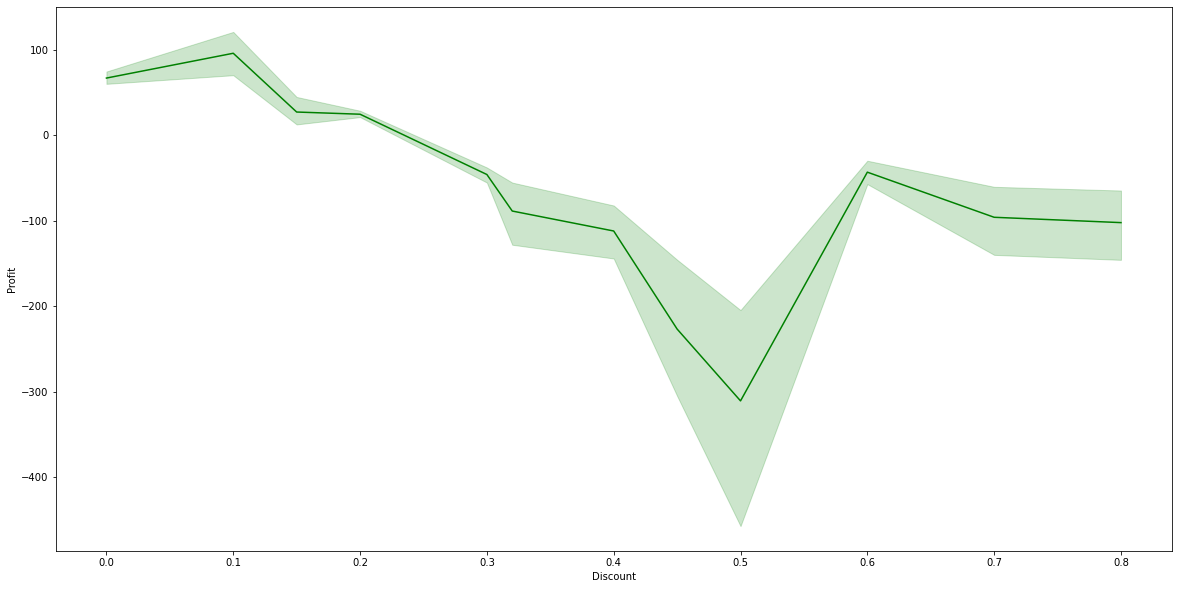

In [22]:
sns.lineplot(x = "Discount", y = "Profit", data = data, color = "green")
plt.show()

**OBSERVATION:** We can clearly observe that the discount has a negative relation with Profit i.e. as the Discount is increasing the Profit generated is decreased.